<a href="https://colab.research.google.com/github/RonaldBH/Ruben-Ronald-Bautista-Huillca/blob/main/ProyectoFinal_AprendizajeAutomatico_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto de Aprendizaje Automático**
# <font color=green>**Predicción de precios inmobiliarios en la provincia de Lima - Perú**</font>
###### https://www.bcrp.gob.pe/estadisticas/indicador-de-precios-de-venta-de-departamentos.html
####**INTEGRANTES:**
##### - BAUTISTA HUILLCA, Ruben Ronald
##### - CANA APU, Orlando
##### - FARFAN ENRIQUEZ, Gabriela
##### - HANCCO CHACO, Jose María
##### - MASIAS USCAMAYTA, Naomi Isabel



> ### Librerías



In [ ]:
# importar libreria de Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import NaN
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

# <font color=dark red>**1. Análisis del negocio**</font>  


In [ ]:
!wget https://www.dropbox.com/s/3s2ztq6meqo4v8y/DataInmobiliaria.csv

--2022-09-08 21:20:37--  https://www.dropbox.com/s/3s2ztq6meqo4v8y/DataInmobiliaria.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3s2ztq6meqo4v8y/DataInmobiliaria.csv [following]
--2022-09-08 21:20:37--  https://www.dropbox.com/s/raw/3s2ztq6meqo4v8y/DataInmobiliaria.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4bf1a0f944d3621525eee207f7.dl.dropboxusercontent.com/cd/0/inline/BsmoHz5DpmA4akJJTOhoaGv8PfJV4ADQ2-SRSQmTANBtx-fN8_X5w6CkzcCVF4iSH0ZayC9QqlnxiF0uWzakg1ixpbVajulN4hxApwnXuURiy-NxgzvgQ9hFk8CkwMVo5AgjjOe_VoGLaZt1dtFNNAKpyA_hwyBmtM10p056ZnqU_A/file# [following]
--2022-09-08 21:20:38--  https://uc4bf1a0f944d3621525eee207f7.dl.dropboxusercontent.com/cd/0/inline/BsmoHz5DpmA4akJJTOhoaGv8PfJV4ADQ2-SRSQmTANBtx-fN8_X5w6Ck

In [ ]:
# leer el archivo de datos con formato .csv y codificado con UTF-8

data = pd.read_csv("DataInmobiliaria.csv", sep=';')
data

,Precio,Distrito,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,532724.0,La Molina,155,3,1.0,0.0,2.0,0.0,3.0
1,265601.0,Miraflores,120,3,1.0,0.0,8.0,0.0,10.0
2,151826.0,Miraflores,100,3,1.0,0.0,9.0,0.0,0.0
3,399543.0,Miraflores,150,3,1.0,0.0,4.0,0.0,0.0
4,296803.0,San Borja,125,3,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
66665,375607.0,Lince,65,2,0.0,0.0,0.0,1.0,2.0
66666,319394.0,Magdalena,86,3,2.0,0.0,0.0,1.0,13.0
66667,127758.0,Magdalena,52,0,2.0,0.0,0.0,1.0,49.0
66668,224853.0,Surquillo,69,2,1.0,0.0,0.0,1.0,30.0


In [ ]:
print(set(data["Distrito"].tolist()))

{'San miguel', 'Cercado de Lima', 'Los olivos', 'los Olivos', 'SURCO', 'san isidro', 'surco', 'San Borja', 'San Isidro', 'Pueblo libre', 'breña', 'San Miguel', 'pueblo Libre', 'SAN ISIDRO', 'La Perla', 'lince', 'La perla', 'Barranco', 'La Molina', 'Chorrillos', 'Surquillo', 'Jesús María', 'Pueblo Libre', 'Los Olivos', 'Magdalena', 'LInce', 'Carabayllo', 'Breña', 'MIRAFLORES', 'SAN BORJA', 'San isidro', 'Miraflores', 'Surco', 'LA MOLINA', 'San borja', 'Lince', 'Bellavista'}


In [ ]:
# Observando los 10 primeros registros
data.head(10)

,Precio,Distrito,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,532724.0,La Molina,155,3,1.0,0.0,2.0,0.0,3.0
1,265601.0,Miraflores,120,3,1.0,0.0,8.0,0.0,10.0
2,151826.0,Miraflores,100,3,1.0,0.0,9.0,0.0,0.0
3,399543.0,Miraflores,150,3,1.0,0.0,4.0,0.0,0.0
4,296803.0,San Borja,125,3,1.0,0.0,1.0,0.0,3.0
5,273972.0,San Borja,122,2,1.0,0.0,1.0,0.0,8.0
6,601217.0,San Borja,261,4,1.0,0.0,1.0,0.0,10.0
7,2226025.0,San Borja,360,7,1.0,0.0,1.0,0.0,3.0
8,399543.0,San Borja,140,3,1.0,0.0,1.0,0.0,3.0
9,753424.0,San Isidro,280,4,1.0,0.0,1.0,0.0,3.0


Predecir el precio de una casa respecto a las sigyuienres variables:


*   Superficie(m²)
*   Numero de habitaciones
*   Numero de baños
*   Numero de garajes

# <font color=dark red>**2. Comprension de datos / Análisis exploratorio de datos**</font>  


In [ ]:
# ver la cantidad de registros
data.shape

(66670, 9)

In [ ]:
# Observamos la cantidad de registros no nulos y su tipo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66670 entries, 0 to 66669
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precio              66670 non-null  float64
 1   Distrito            66670 non-null  object 
 2   Superficie          66670 non-null  int64  
 3   Habitaciones        66670 non-null  int64  
 4   Baños               66664 non-null  float64
 5   Garajes             65572 non-null  float64
 6   Piso de ubicación   66024 non-null  float64
 7   Vista al exterior   66385 non-null  float64
 8   Años de antigüedad  65236 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.6+ MB


([<matplotlib.axis.XTick at 0x7f8c78db8990>,
 <a list of 10 Text major ticklabel objects>)

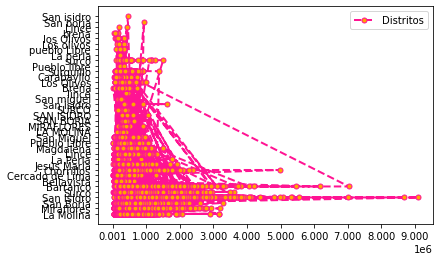

In [ ]:
# Observar como está distribuido la data
plt.plot(data['Precio'],data['Distrito'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Distritos')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

([<matplotlib.axis.XTick at 0x7f8c78069b50>,
 <a list of 10 Text major ticklabel objects>)

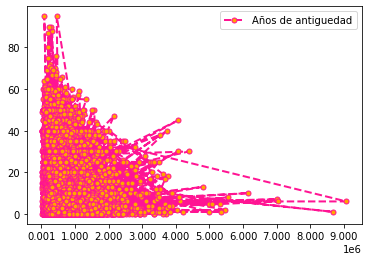

In [ ]:
# Observar como esta distribuido la data
plt.plot(data['Precio'],data['Años de antigüedad'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Años de antiguedad')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

([<matplotlib.axis.XTick at 0x7f8c77fe3550>,
 <a list of 10 Text major ticklabel objects>)

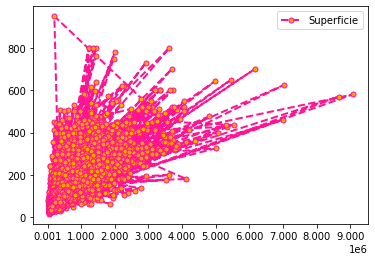

In [ ]:
# Observar como esta distribuido la data
plt.plot(data['Precio'],data['Superficie '],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Superficie')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

([<matplotlib.axis.XTick at 0x7f8c77f68810>,
 <a list of 10 Text major ticklabel objects>)

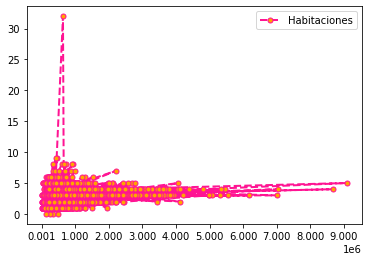

In [ ]:
# Observar como esta distribuido la data
plt.plot(data['Precio'],data['Habitaciones'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Habitaciones')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

In [ ]:
1# Correlación de variables/características
data.corr().style.background_gradient(cmap='coolwarm')

,Precio,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
Precio,1.000000,0.710131,0.242798,0.414673,0.535158,0.036720,0.131361,0.001042
Superficie,0.710131,1.000000,0.418147,0.360921,0.511336,0.022413,0.108755,0.030666
Habitaciones,0.242798,0.418147,1.000000,0.368533,0.209275,0.016542,0.119117,-0.072228
Baños,0.414673,0.360921,0.368533,1.000000,0.304023,0.041169,0.104856,-0.090874
Garajes,0.535158,0.511336,0.209275,0.304023,1.000000,-0.023259,0.142647,-0.120731
Piso de ubicación,0.036720,0.022413,0.016542,0.041169,-0.023259,1.000000,0.031664,-0.050280
Vista al exterior,0.131361,0.108755,0.119117,0.104856,0.142647,0.031664,1.000000,-0.020553
Años de antigüedad,0.001042,0.030666,-0.072228,-0.090874,-0.120731,-0.050280,-0.020553,1.000000


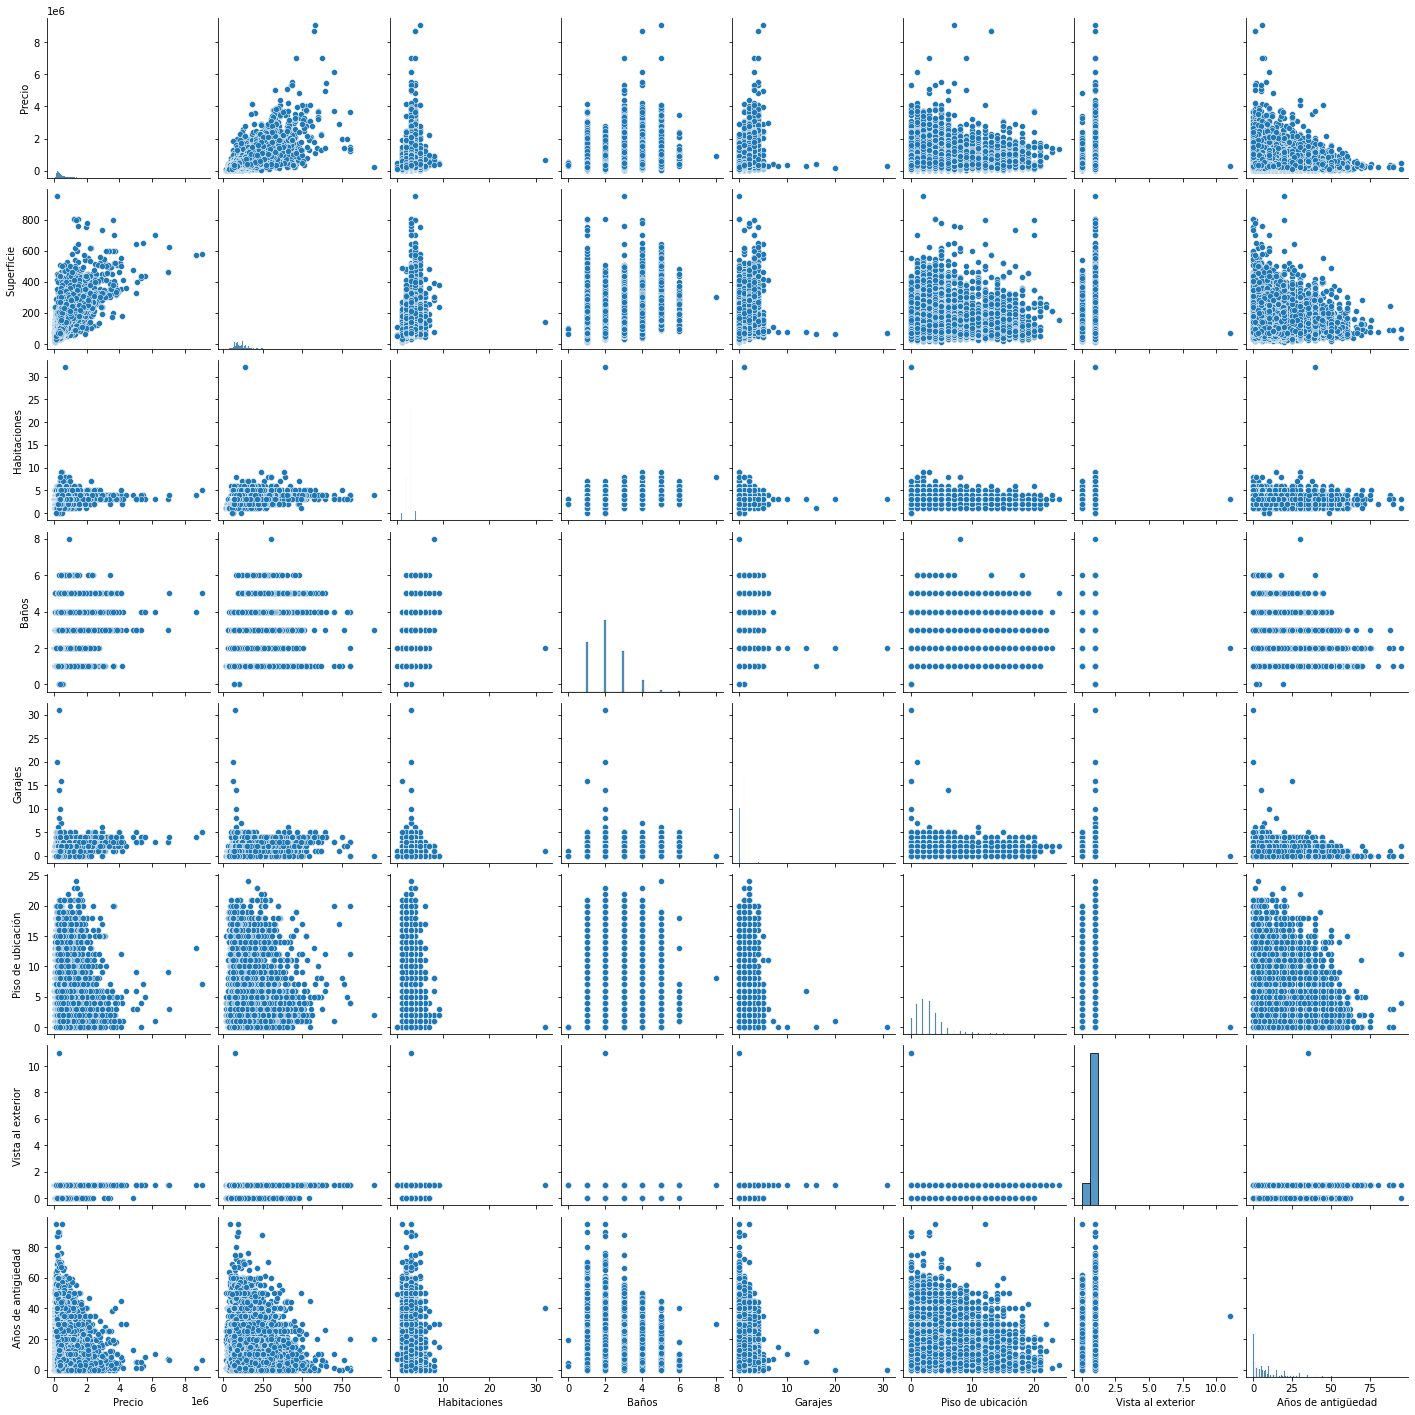

In [ ]:
# Diagrama de pares de la data
sns.pairplot(data);

# <font color=dark red>**3. Preprocesamiento de datos**</font>


In [ ]:
# Seleccionar los registros que tienen un numero de garajes menor e igual a 5
data = data[data['Garajes'] <= 5]
data = data[data['Habitaciones'] < 31]
data = data[data['Superficie '] < 500]
data = data[data['Años de antigüedad'].notna()]
data = data[data['Garajes'].notna()]
data = data[data['Baños'].notna()]
data

,Precio,Distrito,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,532724.0,La Molina,155,3,1.0,0.0,2.0,0.0,3.0
1,265601.0,Miraflores,120,3,1.0,0.0,8.0,0.0,10.0
2,151826.0,Miraflores,100,3,1.0,0.0,9.0,0.0,0.0
3,399543.0,Miraflores,150,3,1.0,0.0,4.0,0.0,0.0
4,296803.0,San Borja,125,3,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
66665,375607.0,Lince,65,2,0.0,0.0,0.0,1.0,2.0
66666,319394.0,Magdalena,86,3,2.0,0.0,0.0,1.0,13.0
66667,127758.0,Magdalena,52,0,2.0,0.0,0.0,1.0,49.0
66668,224853.0,Surquillo,69,2,1.0,0.0,0.0,1.0,30.0


In [ ]:
# ver la cantidad de registros
data.shape

(64378, 9)

In [ ]:
# eliminar columnas que no se utilizaran como variables
data = data.drop(columns={'Distrito', 'Piso de ubicación', 'Vista al exterior'})
data = data.sample(n=50000)
data

,Precio,Superficie,Habitaciones,Baños,Garajes,Años de antigüedad
5354,211325.0,78,2,1.0,1.0,2.0
5536,301893.0,110,3,1.0,1.0,0.0
50869,161386.0,71,1,1.0,0.0,20.0
57699,323813.0,88,3,2.0,0.0,3.0
48316,459818.0,73,2,3.0,2.0,0.0
...,...,...,...,...,...,...
48206,1097397.0,240,3,4.0,2.0,6.0
16930,162023.0,101,3,2.0,0.0,0.0
22836,246007.0,91,2,3.0,0.0,0.0
48712,455842.0,130,3,4.0,1.0,1.0


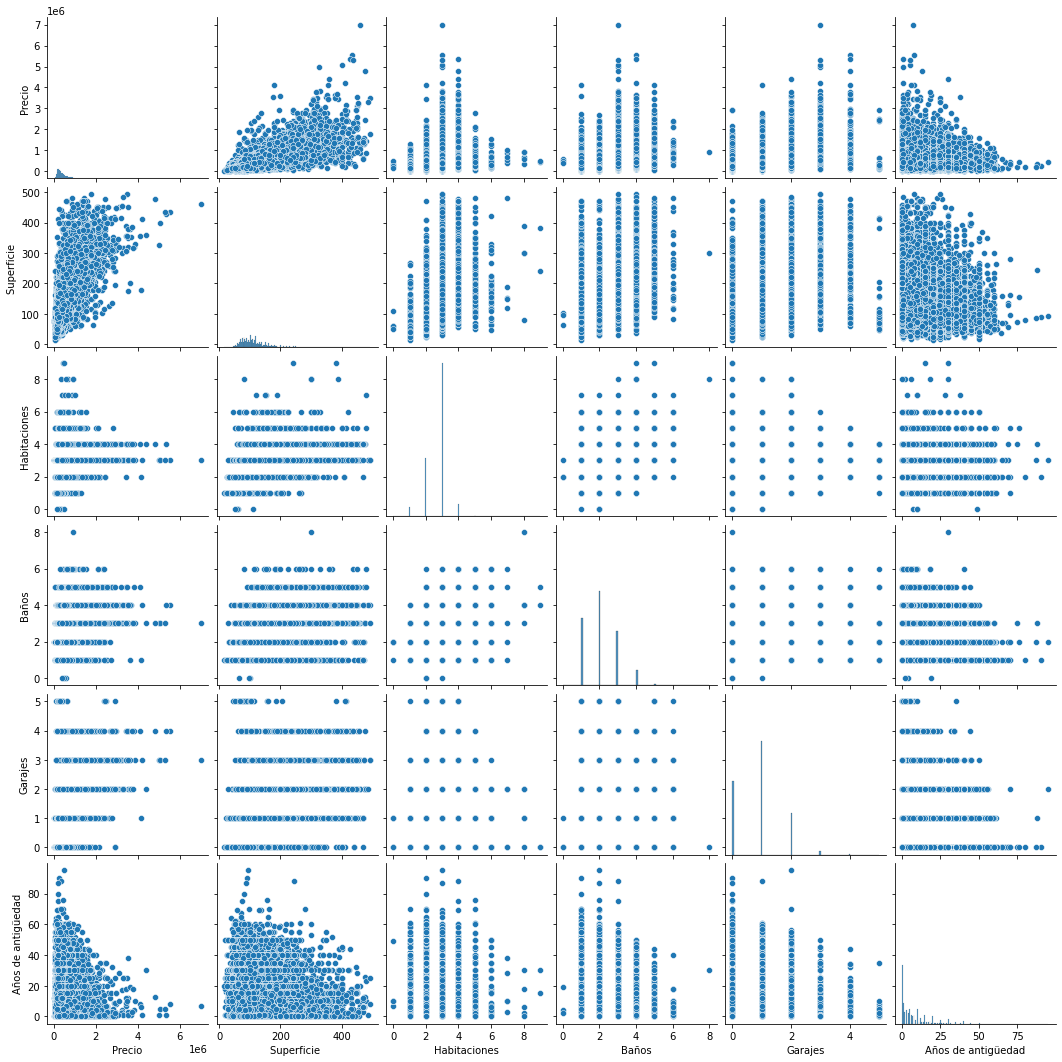

In [ ]:
# Grafico de dispersión
sns.pairplot(data);

In [ ]:
#imprimimos media de los datos
data.mean()

Precio                397855.93280
Superficie               117.23448
Habitaciones               2.73750
Baños                      2.10344
Garajes                    0.90336
Años de antigüedad         8.16590
dtype: float64

In [ ]:
#descripcion general de los datos
DATA=data.describe()
DATA

,Precio,Superficie,Habitaciones,Baños,Garajes,Años de antigüedad
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.978559e+05,117.234480,2.737500,2.103440,0.903360,8.165900
std,3.136439e+05,52.483965,0.646469,0.923449,0.762517,10.451729
min,2.010000e+04,15.000000,0.000000,0.000000,0.000000,0.000000
25%,2.108060e+05,82.000000,2.000000,1.000000,0.000000,1.000000
50%,3.082995e+05,105.000000,3.000000,2.000000,1.000000,5.000000
75%,4.778880e+05,136.000000,3.000000,3.000000,1.000000,11.000000
max,6.998993e+06,494.000000,9.000000,8.000000,5.000000,95.000000


In [ ]:
#eliminamos el count para una mejor visualizacion
DATA=DATA.drop(DATA.index[[0,2]])

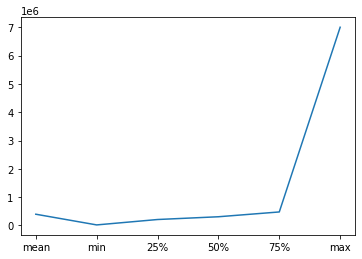

In [ ]:
#visualizamos datos del precio
plt.plot(DATA['Precio'])

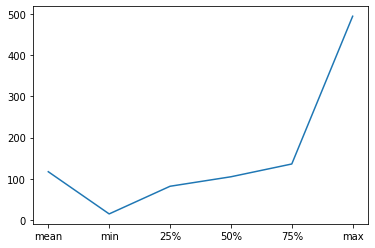

In [ ]:
#visualizamos datos de superficie
plt.plot(DATA['Superficie '])

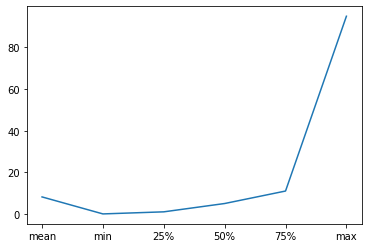

In [ ]:
#visualizamos years de antiguedad
plt.plot(DATA['Años de antigüedad'])

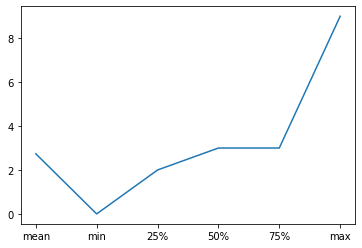

In [ ]:
#Visualizamos datos de habitaciones
plt.plot(DATA['Habitaciones'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


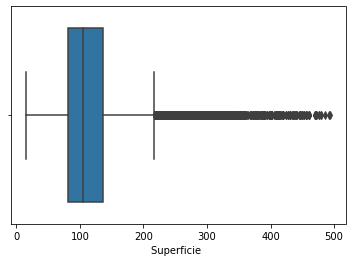

In [ ]:
#datos de superficies
sns.boxplot(data['Superficie ']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


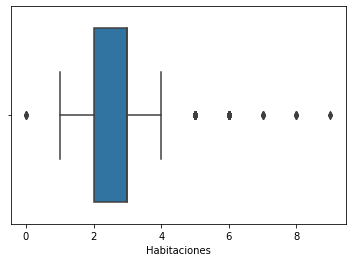

In [ ]:
#datos de Habitaciones
sns.boxplot(data['Habitaciones'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


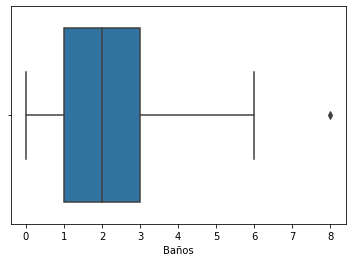

In [ ]:
#datos de toilet
sns.boxplot(data['Baños'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


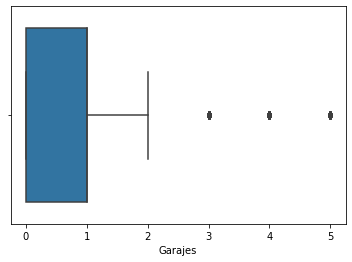

In [ ]:
#datos de garaje
sns.boxplot(data['Garajes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


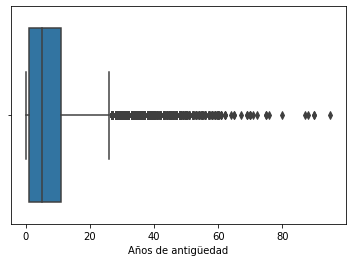

In [ ]:
#datos de Años de antigüedad
sns.boxplot(data['Años de antigüedad'])

# <font color=dark red> **4. Modelado **</font>

In [ ]:
# Separación de la data
X = data.drop(columns={'Precio'})
y = data['Precio']

In [ ]:
# Data train 70% y data test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12);
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# <font color=dark red>**4.1 Modelado por KNN**</font>


In [ ]:
# modelos
KnnRegressor = KNeighborsRegressor(n_neighbors=25, weights='distance')
KnnRegressor.fit(X_train,y_train)
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train,y_train)
DecisionRegressor = DecisionTreeRegressor()
DecisionRegressor.fit(X_train,y_train)
y_predKnn = KnnRegressor.predict(X_test)
y_predlinear = LinearRegressor.predict(X_test)
y_predDeci = DecisionRegressor.predict(X_test)

([<matplotlib.axis.XTick at 0x7f78bd722210>,
 <a list of 5 Text major ticklabel objects>)

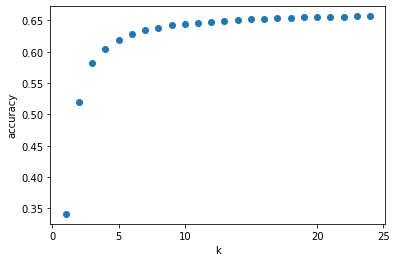

In [ ]:
# graficamos un cuadro para saber cuantos vecimos poner en el modelo KnnRegressor
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    del knn
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,20,25])

# <font color=dark red>**4.2 Modelado por Random forest**</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRndf = RandomForestRegressor(n_estimators=20, random_state=0)
modelRndf.fit(X_train,y_train)

y_predRndf = modelRndf.predict(X_test)

# <font color=dark red>**5. Visualización de datos **</font>


In [ ]:
KnnRegressor.fit(X_train, y_train)
KnnRegressor.score(X_test, y_test)

0.6572113385228958

In [ ]:
LinearRegressor.fit(X_train, y_train)
LinearRegressor.score(X_test, y_test)

0.5811830609746574

In [ ]:
DecisionRegressor.fit(X_train, y_train)
DecisionRegressor.score(X_test, y_test)

0.4544021036844711

In [ ]:
modelRndf.fit(X_train, y_train)
modelRndf.score(X_test, y_test)

0.6107083856347839

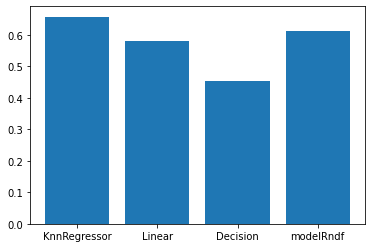

In [ ]:
A=KnnRegressor.score(X_test, y_test)
B=LinearRegressor.score(X_test, y_test)
C=DecisionRegressor.score(X_test, y_test)
D=modelRndf.score(X_test, y_test)
x=[1,2,3,4]
y=[A,B,C,D]
plt.bar(x,y)
plt.xticks(x, ["KnnRegressor","Linear","Decision","modelRndf"])
#plt.yticks('KnnRegressor','LinearRegressor','DecisionRegressor','modelRndf')
plt.show()

Pruebas

In [ ]:
print(KnnRegressor.predict(X_test))

[955788.44686298 371092.79403062 398744.17738831 ... 340336.30688922
 412986.97239569 261645.14752386]


In [ ]:
prueba = [[155,	3, 1.0, 0.0, 3.0],
[120, 3, 1.0, 0.0, 10.0]]
print(KnnRegressor.predict(prueba))

# <font color=dark red>**6. Evaluación / Desempeño de modelos** </font>

---


Utilice metricas para obtener conclusiones y proponer el mejor modelo.

In [ ]:
# Predictions
preds = KnnRegressor.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
66629,357721.0,2.313480e+05,126372.957659
55153,330106.0,2.152627e+05,114843.334780
30304,365063.0,4.366443e+05,-71581.283572
56826,657744.0,5.464958e+05,111248.233630
48934,450214.0,3.312908e+05,118923.151760
...,...,...,...
50672,591748.0,2.902912e+05,301456.844641
8730,1086452.0,8.470505e+05,239401.450748
21255,535282.0,1.066753e+06,-531470.703417
22617,134697.0,1.897277e+05,-55030.661574


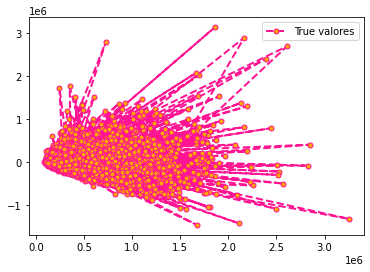

In [ ]:
plt.plot(performance['Prediction'],performance['Error'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='True valores')
plt.legend(loc="upper right")

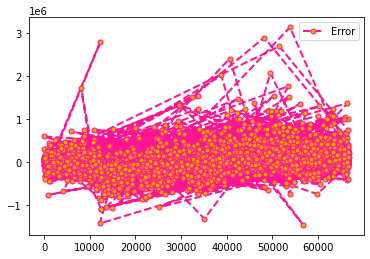

In [ ]:
performance['Error'].plot(color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Error')
plt.legend(loc="upper right")

In [ ]:
from sklearn import metrics
# Error cuadrado
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predKnn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predKnn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predKnn)))

Mean Absolute Error: 116543.15354491415
Mean Squared Error: 36536286747.203674
Root Mean Squared Error: 191144.67491197257


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predlinear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predlinear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlinear)))

Mean Absolute Error: 132828.07990893454
Mean Squared Error: 42614533456.857185
Root Mean Squared Error: 206432.87881744318


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDeci))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDeci))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predDeci)))

Mean Absolute Error: 142051.60904338773
Mean Squared Error: 61457809623.41338
Root Mean Squared Error: 247906.85674949246


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRndf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRndf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predRndf)))

Mean Absolute Error: 124296.66235410894
Mean Squared Error: 42035796653.21875
Root Mean Squared Error: 205026.33160942706



# <font color=dark red>**7. Conclusiones** </font>

Puede escribirlos en texto o explicarlos el día de la sustentación.

In [ ]:
'''
El análisis y la propuesta de este trabajo constituyen a
 la estimación o aproximación del precio con respecto al
 tamaño de superficie, numero de habitaciones, numero de baños,
 numero de garajes y los años de antiguedad.

 Optamos por los algoritmos de regresión, ya que este no busca
 una relación entre las caracteristicas.

 Con respecto al trabajo nuestro modelo no es óptimo ya que
 con KnnRegressor tuvimos un score de 0.64 que es mayor a los
 de regresión lineal y los arboles de decisión para regresión.
'''

'\nEl análisis y la propuesta de este trabajo constituyen a\n la estimación o aproximación del precio con respecto al \n tamaño de superficie, numero de habitaciones, numero de baños, \n numero de garajes y los años de antiguedad.\n\n Optamos por los algoritmos de regresión ya que este no busca \n una relación entre las caracteristicas.\n\n Con respecto al trabajo nuestro modelo no es optimo ya que \n con KnnRegressor tuvimos un score de 0.64 que es mayor a los \n'